In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, subprocess
%load_ext watermark

In [3]:
%watermark

2019-08-12T09:45:03+02:00

CPython 3.6.9
IPython 7.7.0

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 2
interpreter: 64bit


In [3]:
#parameters
workingdir = r"/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/gtex/hsbm/oversigma_10tissue"
#workingdir=r"/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/results/hsbm/highlyvariable_7tissues"
execdir = r"/Users/filippo/Developer/tesi"
#dockerurl = "cloudadm@193.144.35.220:/home/cloudadm/drive"
dockerurl = "filippo.valle@c3s.unito.it:"

In [4]:
os.chdir(workingdir)

# Get the data
[Table_creation](Table_creation.ipynb) does this for you

# Get annotations

In [7]:
df_file=pd.read_csv("files.dat", index_col=[0])
df_file.head()

,primary_site,secondary_site
_c0,,
GTEX-111CU-1826-SM-5GZYN,Adipose Tissue,Adipose - Subcutaneous
GTEX-111FC-0226-SM-5N9B8,Adipose Tissue,Adipose - Subcutaneous
GTEX-11DXW-0326-SM-5H11W,Adipose Tissue,Adipose - Subcutaneous
GTEX-11DZ1-0226-SM-5A5KF,Adipose Tissue,Adipose - Subcutaneous
GTEX-11PRG-0626-SM-5BC56,Adipose Tissue,Adipose - Subcutaneous


In [8]:
df_file.groupby(by='primary_site').count()

,secondary_site
primary_site,
Adipose Tissue,100
Blood,100
Blood Vessel,100
Brain,100
Colon,100
Esophagus,100
Heart,100
Muscle,100
Skin,100


In [9]:
pc=pd.read_csv("%s/genes.txt"%execdir, index_col=[0])
pc=pc[pc['type_of_gene']=='protein-coding']
pc.head()

,lenght,type_of_gene,exons
ENSG00000167578,18722.0,protein-coding,18696.0
ENSG00000078237,46830.0,protein-coding,38812.0
ENSG00000146083,11328.0,protein-coding,10691.0
ENSG00000158486,226330.0,protein-coding,217697.0
ENSG00000198242,4966.0,protein-coding,4375.0


# Run statistics
```python
import tacos
tacos.statistics()
tacos.shuffleLabels()
```

CHECK **BioParameters.h** before compiling

In [4]:
os.chdir(workingdir)
os.system("cp %s/tacos/master/python/addo.py ."%execdir)
os.system("cp %s/tacos/master/data_mining ."%execdir)
os.system("chmod +x data_mining")
os.system("mv mainTable_all.csv mainTable.csv")
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")

0

# Analyse table and select genes

[Table_Analyser.ipynb](Table_Analyzer.ipynb)

In [14]:
os.chdir(execdir)
from tableanalyser import scalinglawsandoverexpressed

<class 'pandas.core.frame.DataFrame'>
Index: 18913 entries, ENSG00000186092 to ENSG00000198727
Columns: 1000 entries, GTEX-11GSO-2426-SM-5A5LY to GTEX-11XUK-0005-SM-5LU9F
dtypes: int64(1000)
memory usage: 144.4+ MB
None
genes:18913	realizations:1000
<class 'pandas.core.frame.DataFrame'>
Index: 18913 entries, ENSG00000186092 to ENSG00000198727
Data columns (total 4 columns):
mean            18913 non-null float64
variance        18913 non-null float64
type_of_gene    18913 non-null object
occurrence      18913 non-null float64
dtypes: float64(3), object(1)
memory usage: 738.8+ KB
None


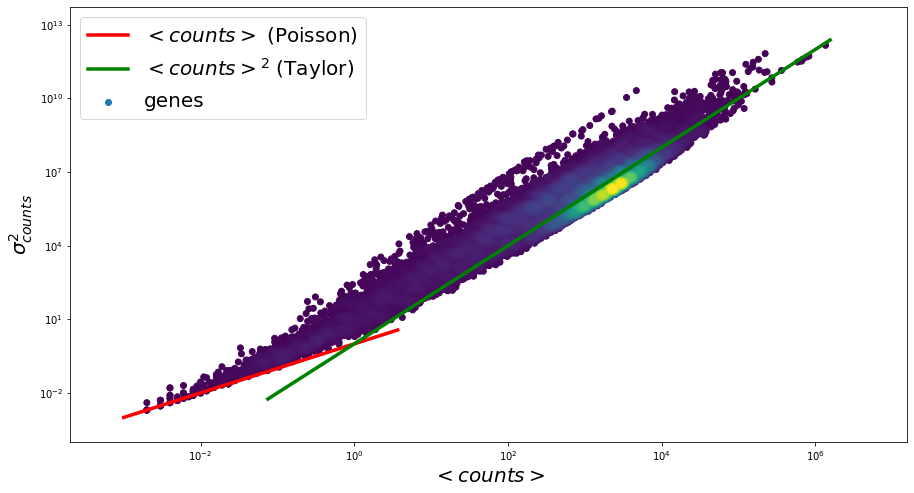

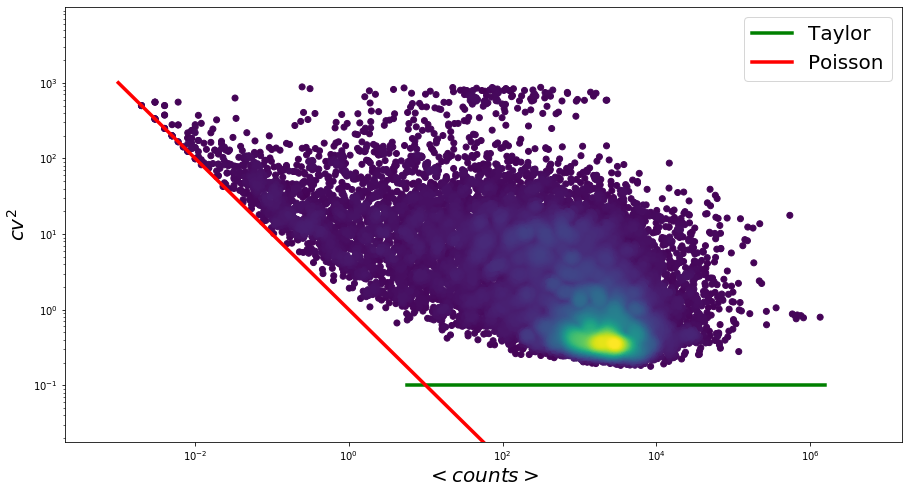

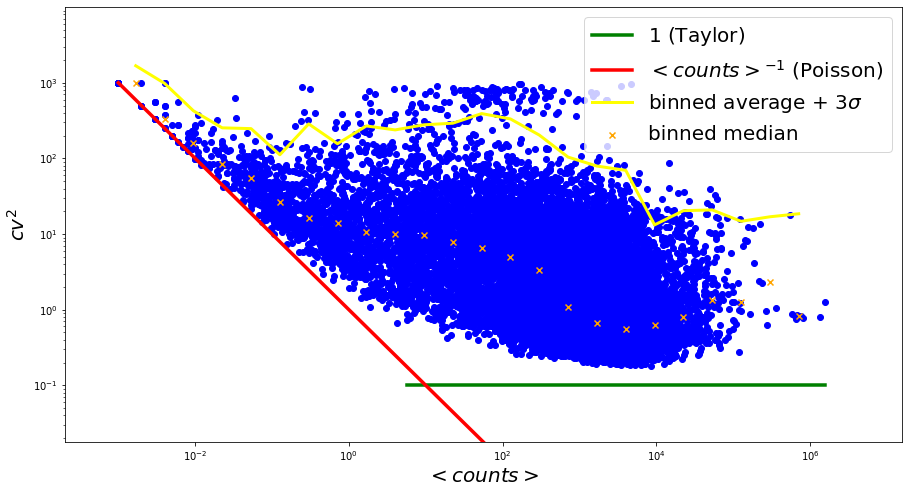

found 3490 highly variable genes


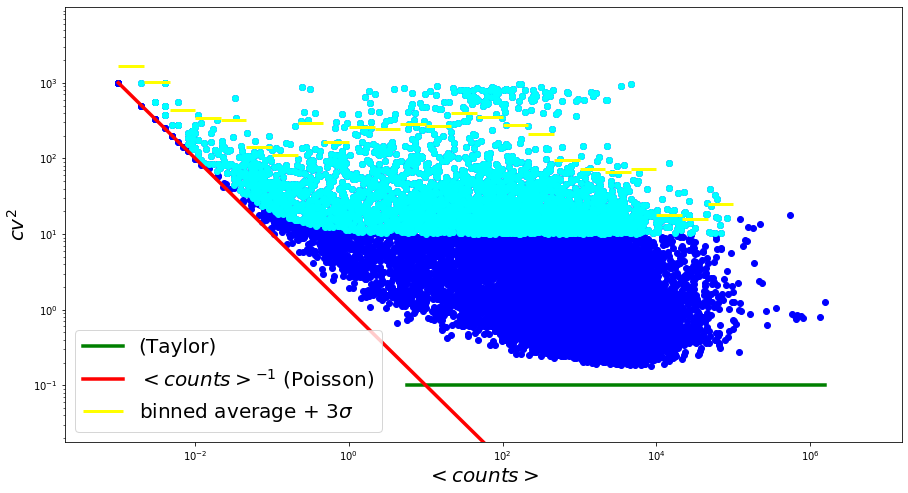

In [16]:
scalinglawsandoverexpressed(workingdir)

In [ ]:
os.chdir(workingdir)
os.system("mv mainTable.csv mainTable_all.csv")
os.system("mv mainTable_over.csv mainTable.csv")

# Make bipartite network
```bash
python addo.py
```
```python
import tacos
tacos.makegraph()
```

In [ ]:
os.chdir(workingdir)
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")
os.system("./data_mining 7")

In [ ]:
os.system("scp graph.xml.gz %s/."%dockerurl)

[hSBM.ipynb]()

# Run stochastic block model
```
docker run -it -p8888:8888 -u user -v $(PWD)/drive/:/home/user/ fvalle01/hsbm bash
jupyter notebook --ip0.0.0.0 --allow-root
```

download the data

In [ ]:
os.chdir(workingdir)
os.system("mkdir -p topsbm")
os.system("scp %s/* topsbm/."%dockerurl)

# Run cluster analysis

In [ ]:
os.chdir(execdir)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
#geneontology

In [ ]:
os.chdir(execdir)
import hsbmpy, importlib
importlib.reload(hsbmpy)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
os.chdir(workingdir)

In [ ]:
labels = ['primary_site', 'secondary_site']
hsbmpy.clusteranalysis(workingdir, labels)

In [ ]:
scores = hsbmpy.get_scores(workingdir,['primary_site','secondary_site'], verbose=False)
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels=[k for k in scores.keys()],xl=getclustersizesarray(workingdir))
plt.show()
fig.savefig("%s/metric.pdf"%(workingdir))

In [ ]:
geneontology.topicanalysis()

# Clean

In [ ]:
os.chdir(workingdir)
os.system("rm -rf data_mining addo.py")